In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from datetime import datetime
import rqdatac as rq
from rqdatac import *

In [2]:
rq.init('18811472509','dennis19940821')
rq.user.get_quota()

In [5]:
fg_data = futures.get_dominant_price('FG',
                           start_date='2017-01-01',
                           end_date='2020-12-31',
                           frequency='1d',
                           fields=['open', 'close'],
                           adjust_type='pre', 
                           adjust_method='open_ratio')

In [7]:
fg_data

open        close
underlying_symbol date                                
FG                2017-01-03   975.046284   959.114155
                  2017-01-04   962.300581   962.300581
                  2017-01-05   960.707368   964.690400
                  2017-01-06   964.690400   960.707368
                  2017-01-09   961.503974   978.232710
...                                   ...          ...
                  2020-12-25  1922.796267  1931.880343
                  2020-12-28  1936.927053  1868.291806
                  2020-12-29  1870.310489  1874.347857
                  2020-12-30  1880.403908  1869.301147
                  2020-12-31  1866.273122  1876.366541

[974 rows x 2 columns]

In [9]:
OLD_PATH = 'D:/data_new'
NEW_PATH = 'D:/data_3part_consecutive_by_name'
OPEN_NAME = 'index_open.csv'
CLOSE_NAME = 'index_close.csv'

In [28]:
old_close = pd.read_csv(os.path.join(OLD_PATH, CLOSE_NAME),
                       index_col = [0,1],
                      parse_dates=True)

In [29]:
old_fg_close = old_close['FG'].groupby(level=0).last()

In [30]:
new_close = pd.read_csv(os.path.join(NEW_PATH, CLOSE_NAME),
                       index_col = [0,1],
                      parse_dates=True)

In [31]:
new_fg_close = new_close['FG'].groupby(level=0).last()

<AxesSubplot:>

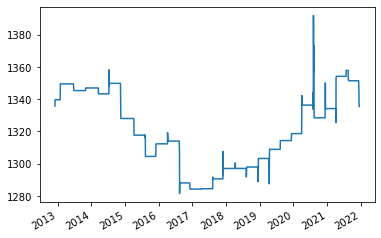

In [35]:
(new_fg_close/old_fg_close).plot()

In [36]:
fg_data_copy = fg_data.copy(deep=True)

In [37]:
fg_data_copy = fg_data_copy.droplevel(level=0)

In [39]:
fg_data_copy.index = pd.to_datetime(fg_data_copy.index)

In [42]:
fg_data_copy['close']

date
2017-01-03     959.114155
2017-01-04     962.300581
2017-01-05     964.690400
2017-01-06     960.707368
2017-01-09     978.232710
                 ...     
2020-12-25    1931.880343
2020-12-28    1868.291806
2020-12-29    1874.347857
2020-12-30    1869.301147
2020-12-31    1876.366541
Name: close, Length: 974, dtype: float64

<AxesSubplot:>

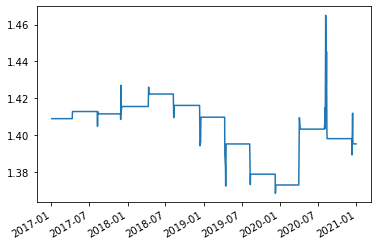

In [43]:
(new_fg_close/fg_data_copy['close']).plot()

In [47]:
1.46/1.38

1.0579710144927537

<AxesSubplot:xlabel='date'>

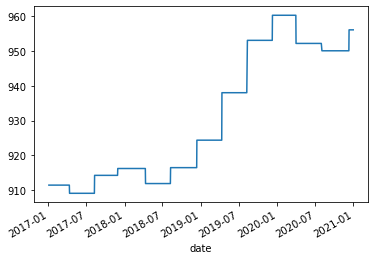

In [45]:
(fg_data_copy['close']/old_fg_close).plot()

In [46]:
960/910

1.054945054945055

In [48]:
1380/1280

1.078125

In [49]:
old_open = pd.read_csv(os.path.join(OLD_PATH, OPEN_NAME),
                       index_col = [0,1],
                      parse_dates=True)

In [50]:
old_fg_open = old_open['FG'].groupby(level=0).last()

In [51]:
new_open = pd.read_csv(os.path.join(NEW_PATH, OPEN_NAME),
                       index_col = [0,1],
                      parse_dates=True)
new_fg_open = new_open['FG'].groupby(level=0).last()

<AxesSubplot:>

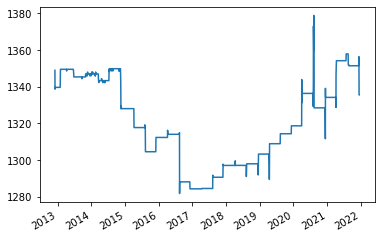

In [58]:
(new_fg_open/old_fg_open).plot()

<AxesSubplot:>

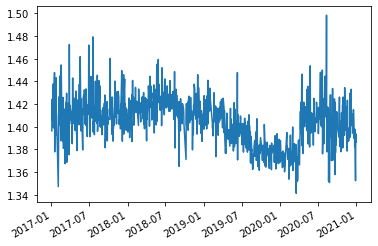

In [53]:
(new_fg_open/fg_data_copy['open']).plot()

<AxesSubplot:xlabel='date'>

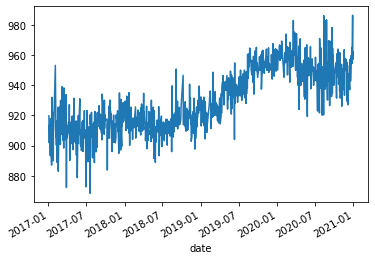

In [54]:
(fg_data_copy['open']/old_fg_open).plot()

In [55]:
980/880

1.1136363636363635

In [56]:
1.5/1.36

1.102941176470588